In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import io
import warnings

import plotly.express as px

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Cena,Miasto,Dzielnica,Cena za m2,M2,Pokoje,Pietro,Szerokosc,Dlugosc
0,329000,Gdańsk,Jasień,13708,24.00,1,0,54.333929,18.566962
1,1290000,Gdańsk,Siedlce,9485,136.00,6,0,54.354798,18.622895
2,490000,Sopot,Kamienny Potok,11666,42.00,2,2,54.453285,18.549294
3,590000,Gdańsk,Nowy Port,8993,65.60,2,1,54.399358,18.668024
4,399000,Gdańsk,Wrzeszcz,13159,30.32,1,2,54.386576,18.626749


In [3]:
#Unikalne wartości dla kolumny Miasto
df=pd.get_dummies(df, columns = ['Miasto'])

In [7]:
df.head()


,Cena,M2,Pokoje,Pietro,Szerokosc,Dlugosc,Miasto_Gdańsk,Miasto_Gdynia,Miasto_Sopot
0,329000,24.00,1,0,54.333929,18.566962,1,0,0
1,1290000,136.00,6,0,54.354798,18.622895,1,0,0
2,490000,42.00,2,2,54.453285,18.549294,0,0,1
3,590000,65.60,2,1,54.399358,18.668024,1,0,0
4,399000,30.32,1,2,54.386576,18.626749,1,0,0


In [6]:
df=df.drop(['Dzielnica', 'Cena za m2'], axis=1)

In [10]:
#zmienne wejściowe
X=df.loc[:,['M2','Pokoje','Pietro','Szerokosc','Dlugosc','Miasto_Gdańsk','Miasto_Gdynia','Miasto_Sopot']]

In [9]:
X

,M2,Pokoje,Pietro,Szerokosc,Dlugosc,Miasto_Gdańsk,Miasto_Gdynia,Miasto_Sopot
0,24.00,1,0,54.333929,18.566962,1,0,0
1,136.00,6,0,54.354798,18.622895,1,0,0
2,42.00,2,2,54.453285,18.549294,0,0,1
3,65.60,2,1,54.399358,18.668024,1,0,0
4,30.32,1,2,54.386576,18.626749,1,0,0
...,...,...,...,...,...,...,...,...
5199,52.88,3,5,54.357287,18.472770,1,0,0
5200,68.50,3,0,54.480953,18.553072,0,1,0
5201,74.00,4,0,54.442660,18.562867,0,0,1
5202,120.00,13,3,54.327642,18.685990,1,0,0


In [12]:
#zmienne wyjśćiowe
y = df.iloc[:,0]

In [13]:
y

0        329000
1       1290000
2        490000
3        590000
4        399000
         ...   
5199     469000
5200    2395000
5201     900000
5202    1150000
5203    1200000
Name: Cena, Length: 5204, dtype: int64

In [15]:
#Klasa ta służy do standaryzacji danych poprzez przeskalowanie wartości każdej zmiennej, aby miała średnią równą 0 i wariancję równą 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
#zbiór treningowy (X_train, y_train) i zbiór testowy (X_test, y_test). 
#Funkcja train_test_split() z pakietu sklearn.model_selection losowo dzieli dane na zbiory treningowy i testowy.
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size = 0.25,random_state=42)

In [17]:
#Klasa ta implementuje algorytm drzewa decyzyjnego dla regresji.
from sklearn.ensemble import ExtraTreesRegressor


In [18]:
model = ExtraTreesRegressor(n_estimators=75, n_jobs=4, random_state=42)
model.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=75, n_jobs=4, random_state=42)

In [19]:
y_pred= model.predict(X_test)


In [20]:
from sklearn.metrics  import r2_score, mean_absolute_error, mean_squared_error 
print('Średni błąd bezwzględny:', mean_absolute_error(y_test, y_pred))
print('Średni błąd kwadratu:', mean_squared_error(y_test, y_pred))
print('Wartość pierwiastka z błedu średnio kwadratowego:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 wynik:", r2_score(y_test, y_pred))

Średni błąd bezwzględny: 150042.97415321547
Średni błąd kwadratu: 98647065167.49895
Wartość pierwiastka z błedu średnio kwadratowego: 314081.30343511206
R2 wynik: 0.7446028127091198


<Figure size 1600x800 with 0 Axes>

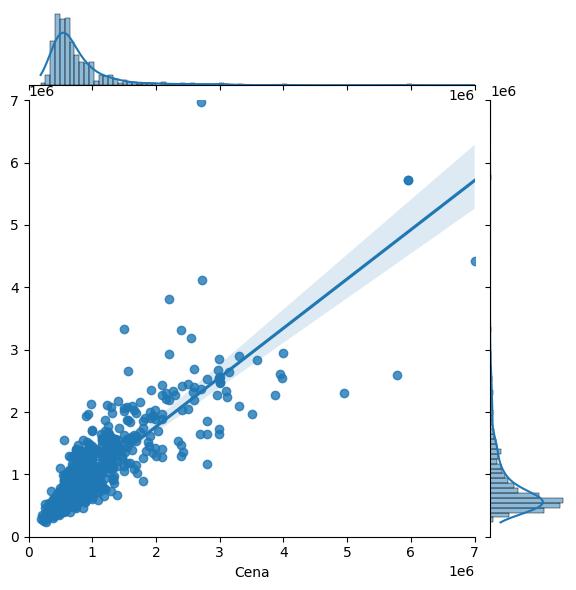

In [21]:
#Ten kod tworzy wykres rozproszenia z dopasowaną linią regresji między rzeczywistymi wartościami y_test a przewidywanymi wartościami y_pred. 
#Funkcja sns.jointplot z biblioteki seaborn tworzy wykres typu jointplot. Parametr kind ustawiony na "reg" oznacza, że linię regresji z
# ostanie dopasowana do danych.
plt.figure(figsize=(16,8))
sns.jointplot(x=y_test, y=y_pred, kind="reg")
plt.xlim(0, 7000000)
plt.ylim(0, 7000000)
plt.show()

In [22]:
df

,Cena,M2,Pokoje,Pietro,Szerokosc,Dlugosc,Miasto_Gdańsk,Miasto_Gdynia,Miasto_Sopot
0,329000,24.00,1,0,54.333929,18.566962,1,0,0
1,1290000,136.00,6,0,54.354798,18.622895,1,0,0
2,490000,42.00,2,2,54.453285,18.549294,0,0,1
3,590000,65.60,2,1,54.399358,18.668024,1,0,0
4,399000,30.32,1,2,54.386576,18.626749,1,0,0
...,...,...,...,...,...,...,...,...,...
5199,469000,52.88,3,5,54.357287,18.472770,1,0,0
5200,2395000,68.50,3,0,54.480953,18.553072,0,1,0
5201,900000,74.00,4,0,54.442660,18.562867,0,0,1
5202,1150000,120.00,13,3,54.327642,18.685990,1,0,0


In [35]:
print(type(new_input[0]))

<class 'list'>


In [45]:
#Przewiduj!
#M2 -> Ilosc pokoi -> Pietro -> Lokalizacja [Szerokosc i dlugosc] - > Miasto[Gdansk, Gdynia, Sopot]
new_input = [[ 40, 2, 1, 54.447126308485615, 18.56674268680144, 0 , 0, 1 ]]
print('Opis twojego Mieszkania:')
print('Powierzchnia:', new_input[0][0], 'm2')
print('Ilość pokoi:', new_input[0][1]) 
print('Piętro:', new_input[0][2]) 

from geopy.geocoders import Nominatim
geolocation = Nominatim(user_agent="my_app", timeout=None)
result = str(new_input[0][3]) + ',' + str(new_input[0][4])
n = geolocation.geocode(result)

print(f"Lokalizacja: {n}")

new_input = scaler.fit_transform(new_input)
yhat = model.predict(new_input)

print('Cena mieszkania wynosi: %d' % yhat[0])

Opis twojego Mieszkania:
Powierzchnia: 40 m2
Ilość pokoi: 2
Piętro: 1
Miasto: 25, Powstańców Warszawy, Sopot Dolny, Sopot, województwo pomorskie, 81-718, Polska
Cena mieszkania wynosi: 921949
